In [23]:
prompt_text = (
    "circular plaza. "
    "one robot plus several pedestrians walking left-right and right-left across the plaza."
)

LLM call attempt 1/3...
Validator logs:
  (none)

Scenario saved to: scenarios/generated/nb_demo_01.json


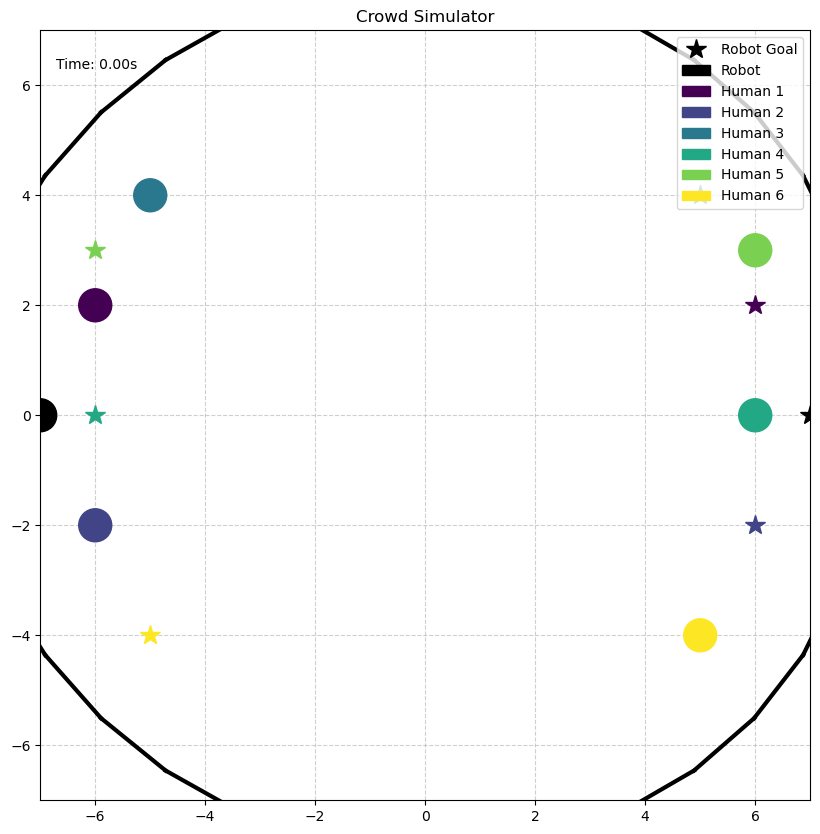

In [24]:
import os, sys
from types import SimpleNamespace
from pathlib import Path

import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. Setup paths and imports
# -----------------------------------------------------------
PROJECT_ROOT = "/Users/jamshin/Downloads/ROB599"
os.chdir(PROJECT_ROOT)
sys.path.append(PROJECT_ROOT)

from scenario_generator import generate_scenario, save_json
from run_scenario import run_once

# -----------------------------------------------------------
# 2. Arguments: NOTE – no `humans` here
# -----------------------------------------------------------
args = SimpleNamespace(
    provider="gemini",
    model="gemini-2.5-flash",   # ✅ actual API model
    temperature=0,
    max_tokens=6000,

    map_type="auto",
    scenario_id="nb_demo_01",
    model_name="gemini-2.5-flash",  # just metadata in the JSON
    seed=42,

    output_dir="scenarios/generated",
)

# -----------------------------------------------------------
# 3. Generate + repair scenario
# -----------------------------------------------------------
raw_json, repaired_json, logs = generate_scenario(prompt_text, args)

print("Validator logs:")
if logs:
    for line in logs:
        print("  -", line)
else:
    print("  (none)")

# -----------------------------------------------------------
# 4. Save repaired JSON
# -----------------------------------------------------------
output_dir = Path(args.output_dir)
output_dir.mkdir(parents=True, exist_ok=True)

scenario_id = repaired_json["metadata"].get("scenario_id", args.scenario_id)
scenario_path = output_dir / f"{scenario_id}.json"
save_json(repaired_json, scenario_path)
print("\nScenario saved to:", scenario_path)

from scenario_io import load_scenario
from scenario_validator import validate_and_repair
from scenario_adapter import scenario_to_simulator

# Load and validate the scenario you just saved
scenario = load_scenario(str(scenario_path))
scenario, logs = validate_and_repair(scenario)

# Build the simulator
sim = scenario_to_simulator(scenario)

# Populate position histories with start positions only
if sim.robot:
    sim.robot.position_history = [sim.robot.get_position()]
for h in sim.humans:
    h.position_history = [h.get_position()]

# Visualize using the simulator’s own drawing code
sim.visualize_simulation(tracker=None, output_file=None, show_plot=True)
